<a href="https://colab.research.google.com/github/Github-sia/MLprojet/blob/master/to3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
#import mxnet as mx
import numpy as np
import os
import urllib
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import logging
logging.basicConfig(level=logging.DEBUG)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [6]:
!git clone https://github.com/Github-sia/MLprojet/

fatal: destination path 'MLprojet' already exists and is not an empty directory.


In [7]:
cd MLprojet/

/content/MLprojet


In [8]:
ls


2Dto3D.ipynb  dataimg.rar             haarcascade_eye.xml  to3D.ipynb
bface.jpg     facial-haarcascade.xml  README.md


In [12]:
!pip install torchsummary 

In [0]:
import torch
import torchlayers as tl
from torchsummary import summary
import torchvision.models as models
# torch.nn and torchlayers can be mixed easily

model = models.vgg16()

In [11]:

if not os.path.exists('deep3d-0050.params'):
    urllib.request.urlretrieve('http://homes.cs.washington.edu/~jxie/download/deep3d-0050.params')
model = mx.model.FeedForward.load('deep3d', 50, mx.gpu(0))

HTTPError: ignored

In [0]:
import mxnet as mx

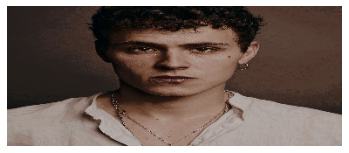

In [17]:
shape = (384, 160)
img = cv2.imread('bface.jpg')
raw_shape = (img.shape[1], img.shape[0])
img = cv2.resize(img, shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [30]:
X = img.astype(np.float32).transpose((2,0,1))
X = X.reshape((1,)+X.shape)
test_iter = mx.io.NDArrayIter({'left': X, 'left0':X})

Y = model.parameters(test_iter)

right = np.clip(Y.send((1,2,0)), 0, 255)
right = Image.fromarray(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))
left = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
writeGif('demo.gif', [left, right], duration=0.080)

NameError: ignored